# Solving non-linear equations
Solving non-linear equations is a fundamental task in scientific computing and engineering. Unlike linear equations, non-linear equations involve variables raised to powers, products of variables, or transcendental functions such as exponentials, logarithms, and trigonometric functions. These equations often do not have closed-form solutions and require iterative numerical methods to find roots.

In this notebook, we focus on scalar non-linear equations, which involve a single unknown variable. Common techniques for solving such equations include the bisection method, fixed point iterations, Newton-Raphson method, and secant method. These methods are implemented in scientific libraries such as SciPy, making it straightforward to apply them to a wide range of problems. We will look into these methods here. 

## Summary of Convergence of Sequences

A sequence is said to converge if its terms approach a specific value, called the limit, as the sequence progresses. Formally, a 
sequence $(x_n)$ converges to a limit $L$ if for every $\epsilon > 0$, there exists an integer $N$ such that for all $n \geq N$, $|x_n - L| < \epsilon$.

Key points:
- **Convergent sequence:** Approaches a finite limit.
- **Divergent sequence:** Does not approach any finite limit.
- **Squeeze (Sandwich) Theorem:** If a sequence is bounded above and below by two sequences that converge to the same limit, then it also converges to that limit.
Convergence is fundamental in analysis and underpins many numerical methods for solving equations and optimization problems.

### Algebraic Rules for Limits

- **Sum Rule:** $\displaystyle \lim_{n \to \infty} (a_n + b_n) = \lim_{n \to \infty} a_n + \lim_{n \to \infty} b_n$
- **Difference Rule:** $\displaystyle \lim_{n \to \infty} (a_n - b_n) = \lim_{n \to \infty} a_n - \lim_{n \to \infty} b_n$
- **Product Rule:** $\displaystyle \lim_{n \to \infty} (a_n b_n) = \left(\lim_{n \to \infty} a_n\right) \left(\lim_{n \to \infty} b_n\right)$
- **Quotient Rule:** $\displaystyle \lim_{n \to \infty} \frac{a_n}{b_n} = \frac{\lim_{n \to \infty} a_n}{\lim_{n \to \infty} b_n}$, provided $\lim_{n \to \infty} b_n \neq 0$
- **Constant Multiple Rule:** $\displaystyle \lim_{n \to \infty} (c a_n) = c \lim_{n \to \infty} a_n$ for any constant $c$

These rules allow us to compute limits of complex sequences by breaking them down into simpler components.

### Theorem: Limit of a Function at a Point

Let $f(x)$ be defined on an open interval containing $a$ (except possibly at $a$ itself). We say that $\displaystyle \lim_{x \to a} f(x) = L$ if for every $\epsilon > 0$, there exists a $\delta > 0$ such that whenever $0 < |x - a| < \delta$, it follows that $|f(x) - L| < \epsilon$.

This theorem formalizes the concept of a function approaching a value $L$ as $x$ approaches $a$, and is foundational for calculus and analysis.

## Introduction to the Bisection Method

The bisection method is a simple and robust numerical technique for finding roots of a continuous function. It is based on the Intermediate Value Theorem, which states that if a continuous function changes sign over an interval \([a, b]\), then there exists at least one root in that interval.

The method works by repeatedly dividing the interval in half and selecting the subinterval where the function changes sign. This process is continued until the interval is sufficiently small, and the midpoint is taken as an approximation of the root.

**Key features:**
- Guaranteed convergence if the function is continuous and the initial interval brackets a root.
- Slow but reliable; the interval decreases by half with each iteration.
- Does not require derivatives or complex calculations.

The bisection method is often used as a starting point for more advanced root-finding algorithms or when reliability is more important than speed.

### Concept: $f(a)f(b) < 0$

For the bisection method to work, the function $f(x)$ must be continuous on the interval $[a, b]$, and the values at the endpoints must satisfy $f(a)f(b) < 0$. This condition ensures that $f(a)$ and $f(b)$ have opposite signs, indicating that there is at least one root in the interval due to the Intermediate Value Theorem.

### Bisection Method Algorithm

1. **Choose interval $[a, b]$** such that $f(a)f(b) < 0$.
2. **Compute midpoint:** $c = \frac{a + b}{2}$.
3. **Evaluate $f(c)$:**
    - If $f(c) = 0$, then $c$ is the root.
    - If $f(a)f(c) < 0$, set $b = c$.
    - If $f(b)f(c) < 0$, set $a = c$.
4. **Repeat steps 2–3** until the interval $[a, b]$ is sufficiently small (i.e., $|b - a| < \epsilon$ for some tolerance $\epsilon$).
5. **Return $c$** as the approximate root.

In [167]:
import numpy as np
def bisection_method(f, a, b, tol=1e-6, max_iter=100, verbose=False):
    """
    Find a root of the function f in the interval [a, b] using the bisection method.

    Parameters:
        f : function
            The function for which to find the root.
        a, b : float
            The interval in which to search for the root. Must satisfy f(a)*f(b) < 0.
        tol : float, optional
            The tolerance for stopping (default is 1e-6).
        max_iter : int, optional
            Maximum number of iterations (default is 100).

    Returns:
        float
            Approximate root location.
    """
    intervals=[]
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    if verbose:
        print(f"Starting bisection method on interval [{a}, {b}] with tolerance {tol}")
        intervals.append((a, b))
    for i in range(max_iter):
        c = (a + b) / 2.0
        if abs(f(c)) < tol or abs(b - a) < tol:
            if verbose:
                print(f"Converged in {i} iterations.")
            return c, intervals
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if verbose:
            print(f"Iteration {i}: [{a}, {b}], f(c)={f(c)}")
            intervals.append((a, b))
    if verbose:
        print("Maximum iterations reached.")
    return (a + b) / 2.0, intervals

## Example: 
Solving $f(x) = x - \cos(x) - 1 = 0$ Using the Bisection Method

Let's find a root of the equation \( x - \cos(x) - 1 = 0 \) using the bisection method.

### Step 1: Define the Function

Let $ f(x) = x - \cos(x) - 1 $.

### Step 2: Choose an Interval

We need to choose an interval \([a, b]\) such that \( f(a)f(b) < 0 \).  
For example, evaluating at \( x = 1 \) and \( x = 2 \):

- $ f(1) = 1 - \cos(1) - 1 \approx -0.54  $
- $ f(2) = 2 - \cos(2) - 1 \approx 1.42  $

Since  $ f(1) < 0 $ and  $ f(2) > 0 $, the interval  $[1, 2]$ brackets a root.

### Step 3: Apply the Bisection Method

We can use the `bisection_method` function to find the root in  $[1, 2]$:

```python
import numpy as np

def f(x):
    return x - np.cos(x) - 1

root = bisection_method(f, 1, 2)
print(f"Approximate root: {root}")
```

### Step 4: Interpretation

The output will give an approximate value of  $ x $ where  $ x - \cos(x) - 1 = 0 $.  
This demonstrates how the bisection method can be used to solve non-linear equations numerically.

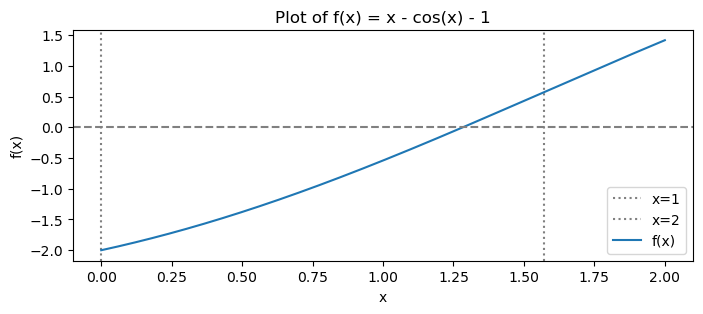

In [185]:
import matplotlib.pyplot as plt
def f(x):
    return x - np.cos(x) - 1
    

x_vals = np.linspace(0, 2, 400)
y_vals = f(x_vals)
plt.figure(figsize=(8, 3))
plt.axvline(0, color='grey', linestyle=':', label='x=1')
plt.axvline(np.pi/2, color='grey', linestyle=':', label='x=2')
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x - cos(x) - 1')
plt.legend()
plt.show()

f(0) = -2.0  # Should be negative
f(np.pi/2) = 0.5707963267948966  # Should be positive
Approximate root: 1.283428751204764 err: 1.853011499797219e-08 


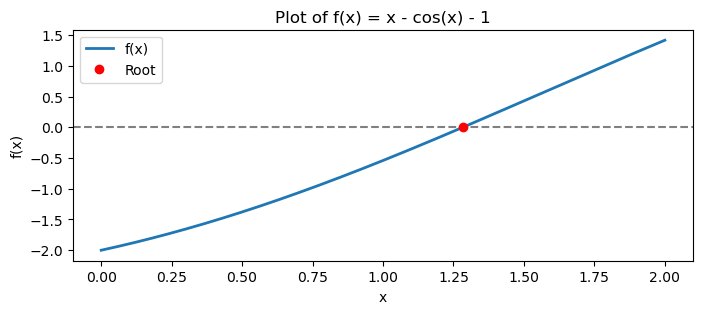

In [189]:

print(f"f(0) = {f(0)}  # Should be negative")
print(f"f(np.pi/2) = {f(np.pi/2)}  # Should be positive")
tol=1e-7
root,intervals = bisection_method(f, 0, np.pi/2, tol=tol, verbose=False)
print(f"Approximate root: {root} err: {f(root)} ")
plt.figure(figsize=(8, 3))
plt.plot(x_vals, y_vals, label='f(x)', linewidth=2)
for left, right in intervals:
	plt.axvline(left, color='purple', linestyle=':', alpha=0.5)
	for idx, (left, right) in enumerate(intervals):
		plt.axvline(left, color='purple', linestyle=':', alpha=0.5)
		plt.text(left, plt.ylim()[1]/2-0.2*idx, f'{idx}', color='black', fontsize=12, ha='center', va='bottom', rotation=90)
		plt.axvline(right, color='orange', linestyle=':', alpha=0.5)
		plt.text(right, plt.ylim()[1]/2-0.2*idx, f'{idx}', color='black', fontsize=12, ha='center', va='bottom', rotation=90)
plt.axhline(0, color='gray', linestyle='--')
plt.plot(root, f(root), 'ro', label='Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x - cos(x) - 1')
plt.legend()
plt.show()

**Tasks** Change the tolerance and see how the number of iterations changes. Can you time the root finding as function of tolerance. 

### Example 3 p151


To solve the equation $f(x) = e^x - 5x + 2 = 0$ using the bisection method, we first select an interval $[a, b]$ where the function changes sign. 


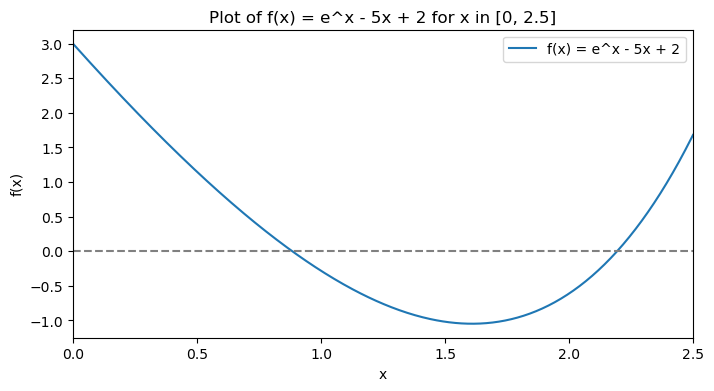

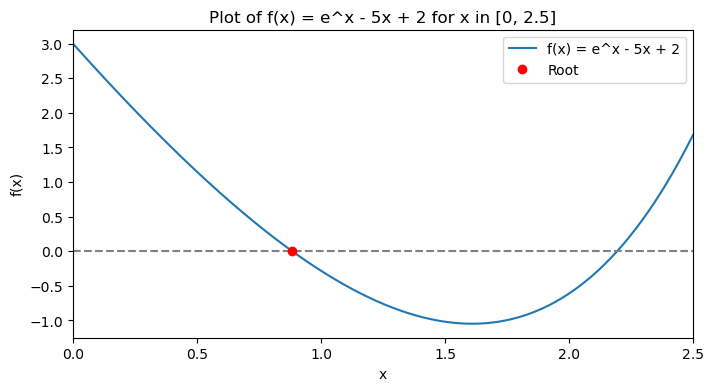

In [194]:
from numpy import exp

def f_ex3(x):
    return np.exp(x) - 5*x + 2

x_vals = np.linspace(0, 2.5, 400)
y_vals = f_ex3(x_vals)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label='f(x) = e^x - 5x + 2')
plt.axhline(0, color='gray', linestyle='--')
plt.xlim(0, 2.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = e^x - 5x + 2 for x in [0, 2.5]')
plt.legend()
plt.show()

tol=1e-7
a=0
b=1.5
root, intervals = bisection_method(f_ex3, a, b, tol=tol,verbose=False)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label='f(x) = e^x - 5x + 2')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(root, f_ex3(root), 'ro', label='Root') 
plt.xlim(0, 2.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = e^x - 5x + 2 for x in [0, 2.5]')
plt.legend()
plt.show()

**Tasks** Can you find the other root?

### Sensitivity to initial interval
The bisection method's performance and the root it finds can depend strongly on the initial interval chosen. For functions with multiple roots, such as $f(x) = \cos(\pi x)$, different intervals may lead to convergence to different roots. Below, we illustrate how varying the starting interval affects the outcome and demonstrate the sensitivity of the method to this choice. This highlights the importance of understanding the function's behavior and carefully selecting the interval to ensure the desired root is found.

Let's start by plotting the function 
$$
f(x)= \cos(\pi x)
$$

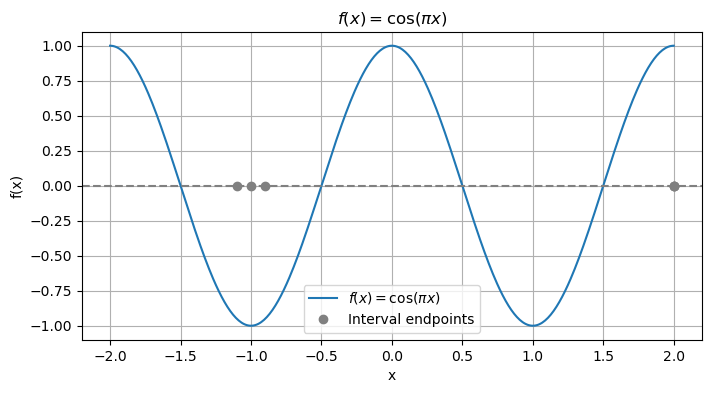

In [196]:
import numpy as np

import matplotlib.pyplot as plt

def f_cos_pi_x(x):
    return np.cos(np.pi * x)

# Plot f(x) = cos(pi x) to visualize roots
x_vals = np.linspace(-2, 2, 400)
y_vals = f_cos_pi_x(x_vals)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(\pi x)$')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = \cos(\pi x)$')

interval1=(-1, 2)   
interval2=(-0.9, 2)
interval3=(-1.1, 2)
plt.plot([interval1[0], interval1[1]], [0, 0], 'o', color='gray', label='Interval endpoints')
plt.plot([interval2[0], interval2[1]], [0, 0], 'o', color='gray')
plt.plot([interval3[0], interval3[1]], [0, 0], 'o', color='gray')

plt.legend()
plt.grid(True)
plt.show()



Root initial interval (-1, 2): 0.5 (cos(pi*0.5)=6.123233995736766e-17)
Root initial interval (-0.9, 2): 1.4999999910593032 (cos(pi*1.4999999910593032)=-2.8088028087247043e-08)
Root initial interval (-1.1, 2): -0.5000000178813935 (cos(pi*-0.5000000178813935)=-5.617605441360006e-08)


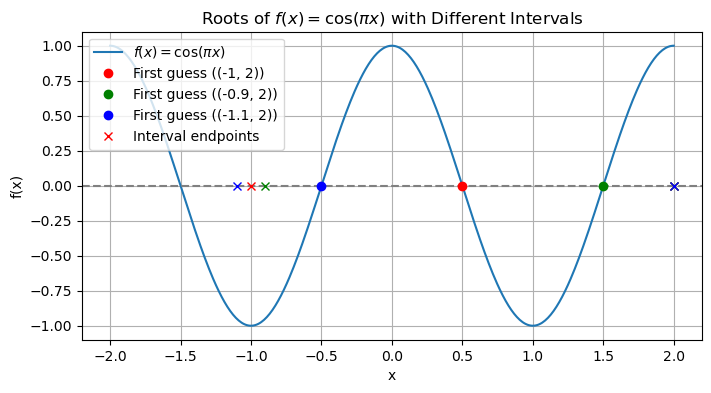

In [199]:

# Tolerance for root finding
tol = 1e-7

# Intervals
interval1=(-1, 2)   
interval2=(-0.9, 2)
interval3=(-1.1, 2)


root1,_ = bisection_method(f_cos_pi_x, interval1[0], interval1[1], tol=tol,verbose=False)
print(f"Root initial interval {interval1}: {root1} (cos(pi*{root1})={f_cos_pi_x(root1)})")


# Interval near x=1 root
root2,_ = bisection_method(f_cos_pi_x, interval2[0], interval2[1], tol=tol,verbose=False)
print(f"Root initial interval {interval2}: {root2} (cos(pi*{root2})={f_cos_pi_x(root2)})")


# Interval near x=1 root
root3,_ = bisection_method(f_cos_pi_x, interval3[0], interval3[1], tol=tol,verbose=False)
print(f"Root initial interval {interval3}: {root3} (cos(pi*{root3})={f_cos_pi_x(root3)})")

# Show roots on plot
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(\pi x)$')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(root1, f_cos_pi_x(root1), 'ro', label=f'First guess ({interval1})')
plt.plot(root2, f_cos_pi_x(root2), 'go', label=f'First guess ({interval2})')
plt.plot(root3, f_cos_pi_x(root3), 'bo', label=f'First guess ({interval3})')

plt.plot([interval1[0], interval1[1]], [0, 0], 'x', color='r', label='Interval endpoints')
plt.plot([interval2[0], interval2[1]], [0, 0], 'x', color='g')
plt.plot([interval3[0], interval3[1]], [0, 0], 'x', color='b')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Roots of $f(x) = \cos(\pi x)$ with Different Intervals')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

 
**Tasks** 

- Can you explain why this small change in the initial interval causes a change in which root we end up at? 
- Will this change if you move the initial lowest $x$-values closer to $-1$? 

## Introduction to Fixed Point Iterations

Fixed point iteration is a fundamental numerical method for solving equations of the form $x = g(x)$. The idea is to start with an initial guess and repeatedly apply the function $g$ to generate a sequence that (hopefully) converges to a solution, called a fixed point.

A fixed point of a function $g(x)$ is a value $x^*$ such that $x^* = g(x^*)$. Many root-finding problems can be reformulated in this way, making fixed point iteration a versatile tool.

**Algorithm:**
1. Choose an initial guess $x_0$.
2. Compute $x_{n+1} = g(x_n)$.
3. Repeat step 2 until $|x_{n+1} - x_n|$ is less than a specified tolerance.

**Key Points:**
- Convergence depends on the properties of $g(x)$ and the choice of initial guess.
- If $|g'(x^*)| < 1$ near the fixed point, the iteration is likely to converge.
- Fixed point iteration is simple to implement but may converge slowly or fail if the function is not well-behaved.

Fixed point methods are widely used in numerical analysis and serve as the basis for more advanced algorithms, such as Newton's method and successive over-relaxation.

In [114]:
#This cell defines a function to create cobweb plots for iterative functions.
# It uses matplotlib for plotting and numpy for numerical operations.

# Use LaTeX throughout the figure for consistency
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
#c('text', usetex=True)
# Figure dpi
dpi = 72
from ipywidgets import interact, widgets
def plot_cobweb(f, r, x0, xmax=1, nmax=40, title=None):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, xmax, 500)
    fig = plt.figure(figsize=(800/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='black', lw=4)
    ax.plot(x, x, c='grey', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    # px, py = np.empty((2,nmax+1,2))
    # px[0], py[0] = x0, 0
    # for n in range(1, nmax, 2):
    #     px[n] = px[n-1]
    #     py[n] = f(px[n-1], r)
    #     px[n+1] = py[n]
    #     py[n+1] = py[n]
    #px, py = np.empty((2,nmax+1,2))
    px=[]
    py=[]
    x=x0
    y=f(x0,r)
    px.append(x0)
    py.append(0)
    px.append(x0)
    py.append(f(x0,r))
    
    for n in range(1, nmax):
        x=y
        px.append(x)
        py.append(y)
        
        y=f(x,r)
        px.append(x)
        py.append(y)
        
        # px[n] = px[n-1]
        # py[n] = f(px[n-1], r)
        # px[n+1] = py[n]
        # py[n+1] = py[n]
    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)
    if title is not None:
        ax.set_title(title)
    plt.show()
    # Annotate and tidy the plot.
#    ax.minorticks_on()
#    ax.grid(which='minor', alpha=0.5)
#    ax.grid(which='major', alpha=0.5)
#    ax.set_aspect('equal')
#    ax.set_xlabel('$x$')
#    ax.set_ylabel(f.latex_label)
#    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))
#
#    plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)



## Example

For the quadratic map $x_{n+1} = r x_n^2$, the stability depends on the parameter $r$ and the derivative at the fixed point. Stability analysis helps predict the long-term behavior of the iteration.
$$
x_{n+1}=rx^2_n
$$

The fixed points of the quadratic map $x_{n+1} = r x_n^2$ are found by solving $x = r x^2$:

- $x^* = 0$
- $x^* = \frac{1}{r}$ (for $r \neq 0$)

**Stability Analysis:**

A fixed point $x^*$ is stable if $|f'(x^*)| < 1$, where $f(x) = r x^2$ and $f'(x) = 2 r x$.

- At $x^* = 0$: $f'(0) = 0$ (always stable)
- At $x^* = \frac{1}{r}$: $f'\left(\frac{1}{r}\right) = 2 r \cdot \frac{1}{r} = 2$

Since $|2| > 1$, the fixed point $x^* = \frac{1}{r}$ is always unstable.

**Summary:**

- $x^* = 0$ is stable for all $r$
- $x^* = \frac{1}{r}$ is unstable for all $r$

In [115]:

func_xr = lambda x,r: r*x**2


def interactive_cob_xr(r= 2, x0=0.5, nmax=1):
    plot_cobweb(func_xr, r= r, x0=x0, xmax=1/r, nmax=nmax, title=f'Cobweb plot for $f(x) = {r}x^2$')

coblayout=Layout(width='10cm')

interact(interactive_cob_xr, r=widgets.FloatSlider(min=0.3, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75,.9],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.interactive_cob_xr(r=2, x0=0.5, nmax=1)>

### Cobweb Plot Example: Fixed Point Iteration for $x = \cos(x) + 1$

To solve the equation $x = \cos(x) + 1$ using fixed point iteration, we define the iteration function:
$$
g(x) = \cos(x) + 1
$$
We start with an initial guess $x_0$ and repeatedly apply $g(x)$ to generate the sequence $x_{n+1} = g(x_n)$.

Below is a cobweb plot illustrating the fixed point iteration for $x = \cos(x) + 1$:



In [ ]:

func_xr1 = lambda x,r: r*np.cos(x)+1


def interactive_cob_xr(r= 1, x0=0.5, nmax=1):
    plot_cobweb(func_xr1, r= r, x0=x0, xmax=2.5, nmax=nmax, title=f'Cobweb plot for $f(x) = {r}\cos(x) + 1$')

coblayout=Layout(width='10cm')

interact(interactive_cob_xr, r=widgets.FloatSlider(min=0.3, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75,.9],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.interactive_cob_xr(r=1, x0=0.5, nmax=1)>

## Example logistic map
The logistic map is a classic example of how simple nonlinear dynamical systems can exhibit a rich variety of behaviors, including stability, periodicity, and chaos. It is defined by the recurrence relation:

$$
x_{n+1} = r x_n (1 - x_n)
$$

where $x_n$ is a number between 0 and 1 representing the population at generation $n$, and $r$ is a parameter controlling the growth rate. As $r$ varies, the logistic map transitions from stable fixed points to periodic cycles and eventually to chaotic dynamics. This makes it a fundamental model in the study of discrete-time population dynamics and chaos theory.


In [118]:

r_vals=[2.9,3.1, 3.2, 3.4491,3.54409, 3.55644]
#logist_plot(3.79946,0.5,xmax)
func_logist = lambda x,r: r*x*(1-x)
def interactive_cob_logist(r= 2, x0=0.5, nmax=4):
    plot_cobweb(func_logist, r= r, x0=x0, xmax=1, nmax=nmax)

coblayout=Layout(width='9cm')
interact(interactive_cob_logist, r=widgets.SelectionSlider(options=r_vals, value=r_vals[0], description='r:',
                                  continuous_update=False, layout=coblayout, readout=True, readout_format='.5f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False, layout=coblayout, readout=True, readout_format='.0f')
             )



interactive(children=(SelectionSlider(continuous_update=False, description='r:', layout=Layout(width='9cm'), o…

<function __main__.interactive_cob_logist(r=2, x0=0.5, nmax=4)>

### Theorem: Convergence of Fixed Point Iterations
1. Let $g(x)$ be a continuous function on an interval $[a, b]$ and suppose that $g(x)$ maps $[a, b]$ into itself, i.e., $g(x) \in [a, b]$ for all $x \in [a, b]$. If there exists a constant $0 < k < 1$ such that
$$
|g(x) - g(y)| \leq k |x - y| \quad \text{for all } x, y \in [a, b],
$$
then $g(x)$ is called a contraction mapping, and the fixed point iteration
$$
x_{n+1} = g(x_n)
$$
will converge to the unique fixed point $x^*$ in $[a, b]$, regardless of the initial guess $x_0 \in [a, b]$.

2. If $g(x)$ is continuously differentiable on $[a, b]$ and there exists a constant $0 < k < 1$ such that
$$
|g'(x)| \leq k \quad \text{for all } x \in [a, b],
$$
then $g(x)$ is a contraction mapping. In this case, the fixed point iteration $x_{n+1} = g(x_n)$ will converge to the unique fixed point in $[a, b]$ for any initial guess $x_0 \in [a, b]$.


**Summary:**  
If $g(x)$ is a contraction on $[a, b]$, then the fixed point iteration converges to the unique fixed point in $[a, b]$.

### Fixed Point Iteration Forms for $ f(x) = e^x - 5x + 2 $

To solve $f(x) = e^x - 5x + 2 = 0$ using fixed point iteration, we rewrite the equation in the form $x = g(x)$. Here are several possible rearrangements:


1. $x = \dfrac{1}{5}(e^x + 2)$ with $g_1(x) = \dfrac{1}{5}(e^x + 2)$ and $g_1'(x) = \dfrac{1}{5}e^x$

2. $x = \ln(5x - 2)$ with  $g_2(x) = \ln(5x - 2)$  with  $g_2'(x) = \dfrac{5}{5x - 2}$ *(Valid only for $5x - 2 > 0$)*

3. $x = e^x - 4x + 2$ with $g_3(x) = e^x - 4x + 2$ with $g_3'(x) = e^x - 4$

---

Each form gives a different fixed point iteration scheme. The convergence depends on the choice of $g(x)$ and the initial guess. Typically, $g_1(x)$ and $g_3(x)$ are more stable for this equation.


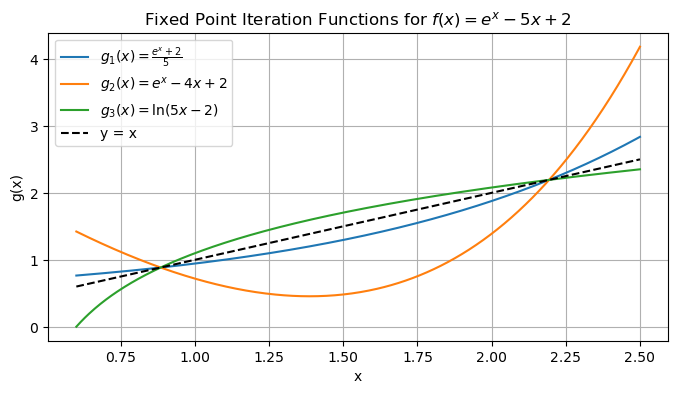

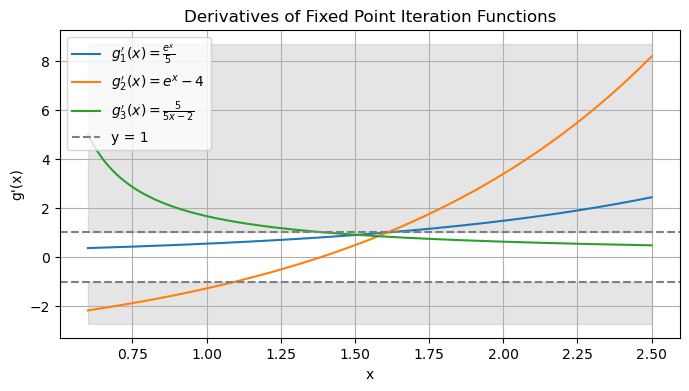

In [141]:
# Define the three fixed point iteration functions for f(x) = e^x - 5x + 2 = 0
def g1(x):
    return (np.exp(x) + 2) / 5

def g2(x):
    return np.exp(x) - 4 * x + 2

def g3(x):
    return np.log(5 * x - 2)

# PThe derivatives of g1, g2, g3
def dg1(x):
    return np.exp(x) / 5

def dg2(x):
    return np.exp(x) - 4

def dg3(x):
    return 5 / (5 * x - 2)

# Choose a domain where all functions are defined and real
x_plot = np.linspace(0.6, 2.5, 400)
plt.figure(figsize=(8, 4))

plt.plot(x_plot, g1(x_plot), label=r'$g_1(x) = \frac{e^x + 2}{5}$')
plt.plot(x_plot, g2(x_plot), label=r'$g_2(x) = e^x - 4x + 2$')
plt.plot(x_plot, g3(x_plot), label=r'$g_3(x) = \ln(5x - 2)$')
plt.plot(x_plot, x_plot, 'k--', label='y = x')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Fixed Point Iteration Functions for $f(x) = e^x - 5x + 2$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))


plt.plot(x_plot, dg1(x_plot), label=r"$g_1'(x) = \frac{e^x}{5}$")

plt.plot(x_plot, dg2(x_plot), label=r"$g_2'(x) = e^x - 4$")
plt.plot(x_plot, dg3(x_plot), label=r"$g_3'(x) =\frac{5}{5x - 2} $")
plt.axhline(1, color='gray', linestyle='--', label='y = 1')
plt.axhline(-1, color='gray', linestyle='--')
plt.fill_between(x_plot, 1, plt.ylim()[1], color='gray', alpha=0.2)
plt.fill_between(x_plot, plt.ylim()[0], -1, color='gray', alpha=0.2)
plt.xlabel('x')
plt.ylabel("g'(x)")
plt.title("Derivatives of Fixed Point Iteration Functions")
plt.legend()
plt.grid(True)
plt.show()

Let's make tables 

In [155]:
import pandas as pd

def fixed_point_iteration(g, x0, tol=1e-7, max_iter=15):
    results = []
    x = x0
    for i in range(max_iter):
        x_next = g(x)
        err = abs(x_next - x)
        results.append({'Iteration': i+1, 'x_n': x_next, 'Error': err})
        if err < tol:
            break
        x = x_next
    return pd.DataFrame(results)

x0 = 2.2 # initial guess in the book: 2.2. Try: 1.9, 1.0, 0.9, 0.6 

table_g1 = fixed_point_iteration(g1, x0, tol=tol)
table_g2 = fixed_point_iteration(g2, x0, tol=tol)
table_g3 = fixed_point_iteration(g3, x0, tol=tol)

combined_table = pd.DataFrame({
    'Iteration': table_g1['Iteration'],
    'g1(x)': table_g1['x_n'],
    'g2(x)': table_g2['x_n'],
    'g3(x)': table_g3['x_n']
})
print(combined_table)

    Iteration         g1(x)         g2(x)     g3(x)
0           1  2.205003e+00  2.225013e+00  2.197225
1           2  2.214055e+00  2.353554e+00  2.195681
2           3  2.230552e+00  3.108684e+00  2.194823
3           4  2.260999e+00  1.195682e+01  2.194344
4           5  2.318534e+00  1.558309e+05  2.194077
5           6  2.432154e+00           inf  2.193929
6           7  2.676674e+00           NaN  2.193846
7           8  3.307334e+00           NaN  2.193800
8           9  5.862444e+00           NaN  2.193774
9          10  7.071644e+01           NaN  2.193760
10         11  1.029886e+30           NaN  2.193752
11         12           inf           NaN  2.193747
12         13           inf           NaN  2.193745
13         14           inf           NaN  2.193743
14         15           inf           NaN  2.193743


/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_15382/748069659.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) + 2) / 5
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_15382/3845507111.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  err = abs(x_next - x)
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_15382/748069659.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x) - 4 * x + 2
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_15382/748069659.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  return np.exp(x) - 4 * x + 2


**Tasks**: 

Try in addition to  $x_0=2.2$, set the initial guess to 1.9, 0.9, and 0.6. What do you notice?

## Introduction to Newton's Method

Newton's method, also known as the Newton-Raphson method, is a powerful and widely used technique for finding roots of real-valued functions. It is an iterative algorithm that leverages the function's derivative to rapidly converge to a solution.

Given a nonlinear equation $f(x) = 0$, Newton's method starts with an initial guess $x_0$ and generates a sequence of approximations using the formula:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$
where $f'(x_n)$ is the derivative of $f$ evaluated at $x_n$.

**Key features:**
- Typically converges much faster than methods like bisection or fixed point iteration, especially when the initial guess is close to the root.
- Requires the function to be differentiable and the derivative to be nonzero near the root.
- May fail to converge or diverge if the initial guess is poor or if the derivative is zero or changes rapidly.

Newton's method is fundamental in numerical analysis and is used in a wide range of scientific and engineering applications for solving nonlinear equations.